<a href="https://colab.research.google.com/github/laurenneal/capstone-visual-neuroscience/blob/main/Exploratory_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

Mounted at /content/drive
     \ 25.9 MB 709 kB/s
     |████████████████████████████████| 10.9 MB 6.7 MB/s 
     |████████████████████████████████| 596 kB 57.7 MB/s 
     |████████████████████████████████| 102 kB 11.4 MB/s 
     |████████████████████████████████| 675 kB 60.4 MB/s 
     |████████████████████████████████| 4.7 MB 50.5 MB/s 
     |████████████████████████████████| 63 kB 2.0 MB/s 
     |████████████████████████████████| 812 kB 51.1 MB/s 
     |████████████████████████████████| 38.1 MB 1.3 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.1.1-py2.py3-none-any.whl size=261287 sha256=71eefe58ebb88ad731f027028ca49b73817e67a6cff49e968815d2455164a9e8
  Stored in directory: /tmp/pip-ephem-wheel-cache-ktmmn0l5/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=5f73813e0510eb5020c7078dc7dc98743a077f448585382d61ab8b7784fd2054
  Stored in directory: /root/.cach

In [ ]:
import pandas as pd
from pandas_profiling import ProfileReport
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline
# to include graphs inline within the frontends next to code

sns.set(font_scale = 2)
plt.rcParams['font.size'] = 24

# 1 Frame Window

In [ ]:
#pull in the single framed features
df = pd.read_csv('/content/drive/MyDrive/DS6011_Capstone_VisualNeuroscience/Seeded_CNMF/Extracted_Features/210815_0_20220213T070259_sparse_stim1_draft.csv')#.drop(columns = ['Unnamed: 0']).drop_duplicates()
df.head()

,stack,label,roi,frame,filename,resp,stim1,stim2,stim3,relation_type_stim1,relation_stim1,relation_stim1_+10,relation_type_stim1_+10,relation_stim1_NRNS-NRNS,relation_stim1_NRNS-NRPS,relation_stim1_NRNS-PRNS,relation_stim1_NRNS-PRPS,relation_stim1_NRPS-NRNS,relation_stim1_NRPS-NRPS,relation_stim1_NRPS-PRNS,relation_stim1_NRPS-PRPS,relation_stim1_PRNS-NRNS,relation_stim1_PRNS-NRPS,relation_stim1_PRNS-PRNS,relation_stim1_PRNS-PRPS,relation_stim1_PRPS-NRNS,relation_stim1_PRPS-NRPS,relation_stim1_PRPS-PRNS,relation_stim1_PRPS-PRPS
0,1,tm2,1,0,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,-0.106575,-0.395877,160.447960,0.110063,NRNS,0.000001,3.629198e-13,PRNS,0.0,0.0,4.085733e-19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.000000e+00
1,1,tm2,1,1,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.244535,-0.395877,0.000000,0.000000,PRNS,0.000020,2.510677e-08,PRPS,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.946459e-13,0.0,0.0,0.0,0.000000e+00
2,1,tm2,1,2,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.398458,-0.395877,0.000000,0.000000,PRNS,0.000188,3.087067e-06,PRPS,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.799064e-10,0.0,0.0,0.0,0.000000e+00
3,1,tm2,1,3,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.619290,-0.138699,170.252676,0.030790,PRNS,0.000042,3.889907e-07,PRPS,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.628974e-11,0.0,0.0,0.0,0.000000e+00
4,1,tm2,1,4,210815_0_1_stackRaw_mc_mix1_syt_result_2022021...,0.627615,0.890013,-62.485104,0.122134,PRPS,0.001595,1.230450e-05,PRPS,0.0,0.0,0.000000e+00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000e+00,0.0,0.0,0.0,1.962413e-08


In [ ]:
## Uncomment this cell to remove outliers (over 3 stdev from mean)

# from scipy import stats

# def drop_numerical_outliers(df, z_thresh=3):
#     # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
#     constrains = df.select_dtypes(include=[np.number]) \
#         .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh, result_type='reduce') \
#         .all(axis=1)
#     # Drop (inplace) values set to be rejected
#     df.drop(df.index[~constrains], inplace=True)

# drop_numerical_outliers(df)

In [ ]:
#profile report to see if anything stands out

profile = ProfileReport(df, 
                        title='Pandas Profiling Report',
                        html={'style':{'full_width':True}},
                       minimal=True)
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
#see means across cell types
cell_types = df.groupby(['stack', 'roi']).mean()
cell_types

frame      resp  ...  relation_stim1_PRPS-PRNS  relation_stim1_PRPS-PRPS
stack roi                    ...                                                    
1     1    2751.0  0.353460  ...              9.766806e-09              3.900184e-10
      2    2751.0  0.343698  ...              5.452884e-09              5.715308e-09
      3    2751.0  0.413132  ...              1.160006e-08              1.347336e-08
      4    2751.0  0.338016  ...              3.921671e-10              9.788794e-10
      5    2751.0  0.287580  ...              7.914349e-08              3.805766e-10
...           ...       ...  ...                       ...                       ...
10    11   2751.0  0.429451  ...              2.232014e-09              2.214763e-09
      12   2751.0  0.113732  ...              1.155674e-09              9.870609e-10
      13   2751.0  0.096774  ...              5.125872e-12              8.895473e-12
      14   2751.0  0.185513  ...              5.664207e-11              1.558053e-11
      15   2751.0  0.207127  ...              1.839609e-11              5.104677e-12

[149 rows x 23 columns]

In [ ]:
import numpy as np
from sklearn.decomposition import PCA

sparse_cols = [col for col in df.columns if 'relation_stim1_' in col]

X = df[sparse_cols]

pca = PCA(2)
components = pca.fit_transform(X)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)


[0.99617895 0.00225534]
[0.1182346  0.00562577]


In [ ]:
pca_df = pd.DataFrame(data = components, columns = ['principal component 1', 'principal component 2'])


pca_df = pd.concat([pca_df, df[['label']]], axis = 1)

pca_df

,principal component 1,principal component 2,label
0,-0.000006,1.490291e-07,tm2
1,-0.000006,1.482089e-07,tm2
2,-0.000003,4.810196e-08,tm2
3,-0.000005,1.363189e-07,tm2
4,0.000006,-2.529925e-07,tm2
...,...,...,...
819942,-0.000006,1.490176e-07,tm4
819943,-0.000006,1.490227e-07,tm4
819944,-0.000006,1.482527e-07,tm4
819945,-0.000006,1.488600e-07,tm4


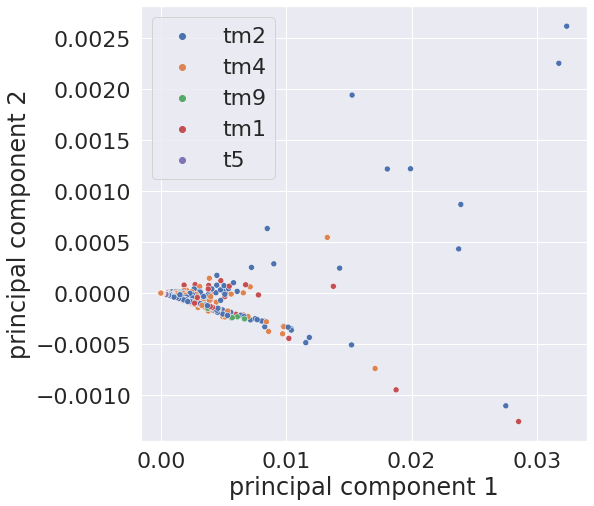

In [ ]:
plt.figure(figsize = (8,8))
sns.scatterplot(x=pca_df['principal component 1'], y=pca_df['principal component 2'], hue=pca_df['label'])
plt.legend()